### Rice Diseases are classified using CNN with Tensorflow

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# import train.csv file
data = pd.read_csv("./data/train.csv")
data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [3]:
# check the shape of data
data.shape

(10407, 4)

In [4]:
data['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [5]:
data['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [6]:
data['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

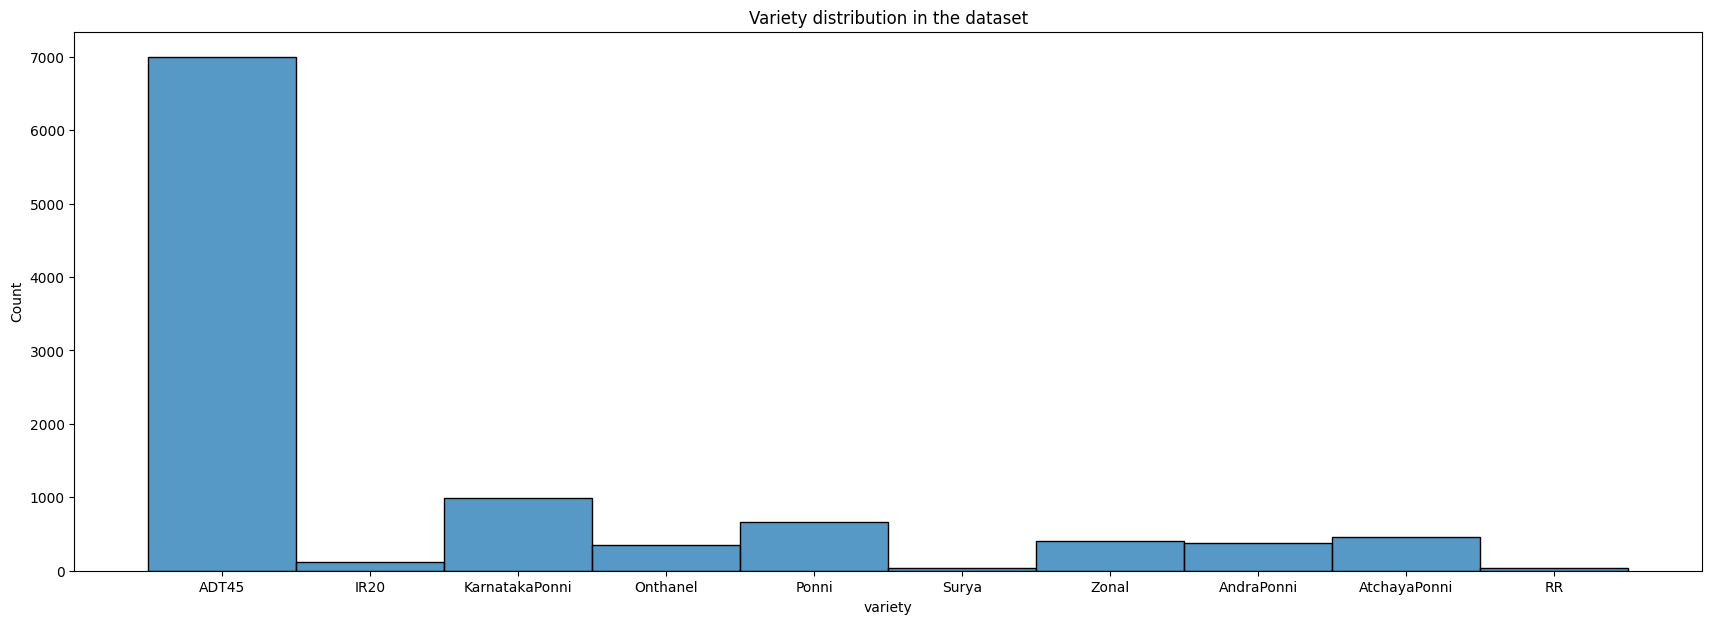

In [7]:
# plot the data count based on variety name
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(data,x='variety',ax=axes)
plt.title('Variety distribution in the dataset')
plt.show()

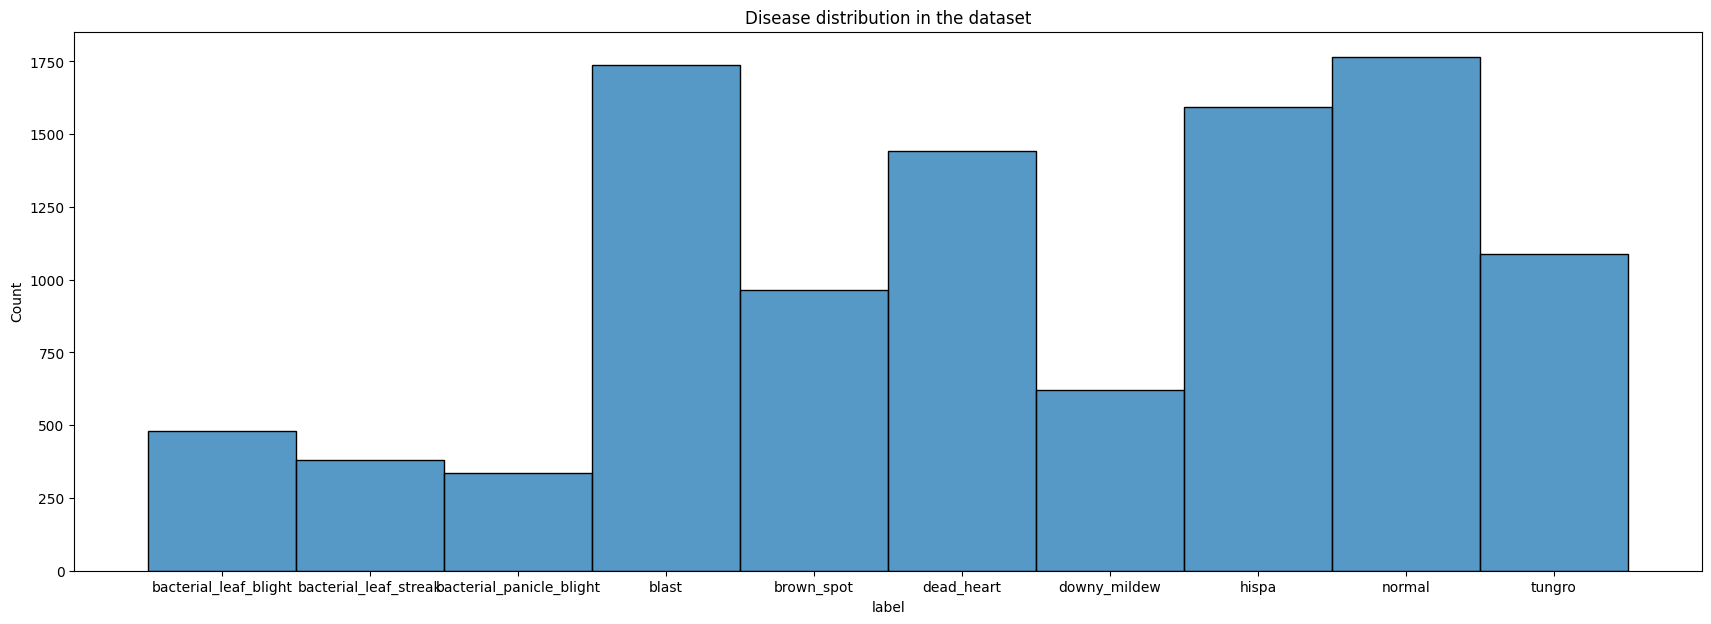

In [8]:
# plot the data count based on variety name
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(data,x='label',ax=axes)
plt.title('Disease distribution in the dataset')
plt.show()

In [9]:
normal = data[data['label'] =='normal']
normal = normal[normal['variety'] =='ADT45']
five_normals = normal.image_id[:5].values
five_normals.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [10]:
dead = data[data['label'] =='dead_heart']
dead = dead[dead['variety'] =='ADT45']
five_deads= dead.image_id[:5].values
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

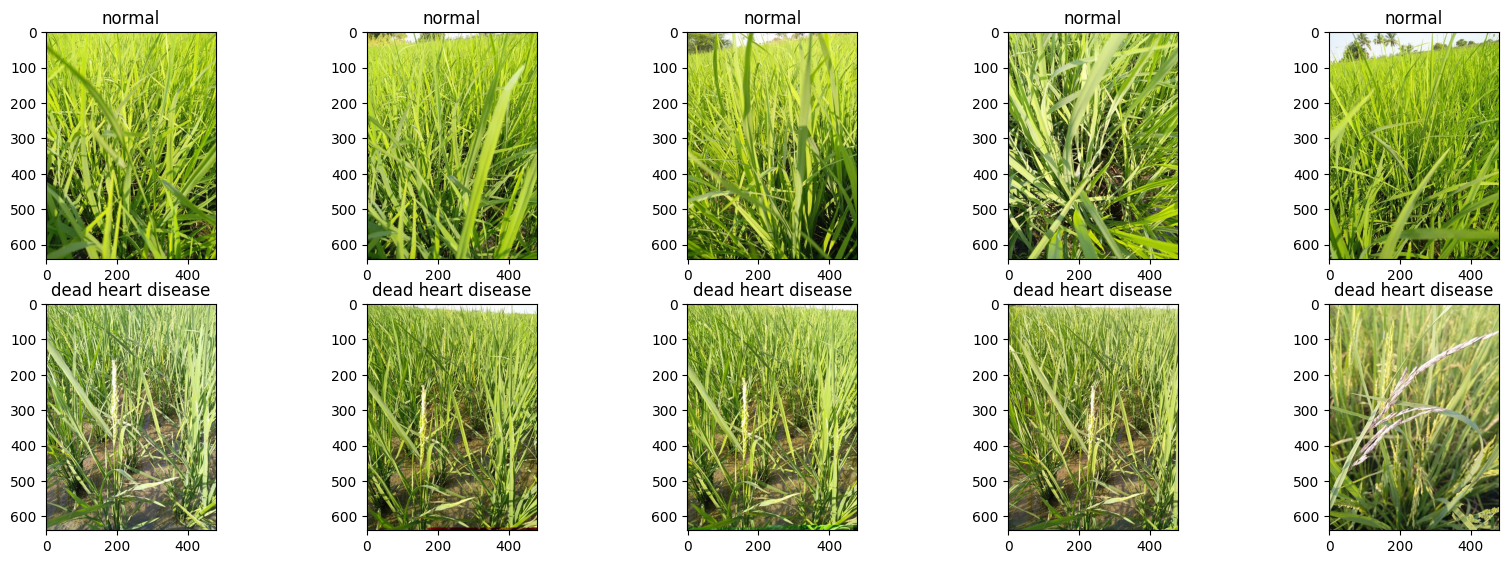

In [11]:
# make plot of images just to have an idea
plt.figure(figsize=(20,10))
columns = 5
path = './data/train_images/'
for i, image_loc in enumerate(np.concatenate((five_normals, five_deads))):
    plt.subplot(10//columns + 1, columns, i + 1)
    
    if i < 5:
        image=plt.imread(path +"normal/"+ image_loc)
        plt.title("normal")
    else:
        plt.title("dead heart disease")
        image=plt.imread(path +"dead_heart/"+ image_loc)
        
    plt.imshow(image)

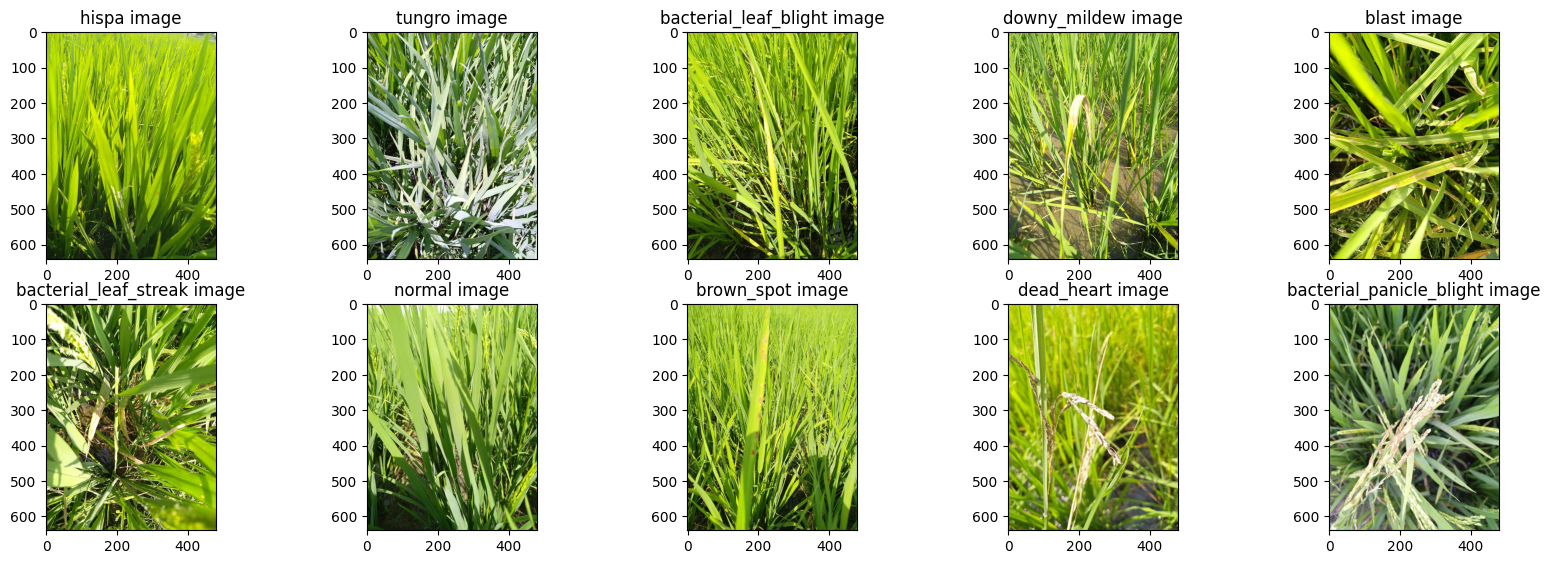

In [12]:
images = ['./data/train_images/hispa/106590.jpg',\
          './data/train_images/tungro/109629.jpg',\
          './data/train_images/bacterial_leaf_blight/109372.jpg',\
          './data/train_images/downy_mildew/102350.jpg',\
          './data/train_images/blast/110243.jpg',\
          './data/train_images/bacterial_leaf_streak/101104.jpg',\
          './data/train_images/normal/109760.jpg',\
          './data/train_images/brown_spot/104675.jpg',\
          './data/train_images/dead_heart/105159.jpg',\
          './data/train_images/bacterial_panicle_blight/101351.jpg',\
         ]
diseases = ['hispa','tungro','bacterial_leaf_blight','downy_mildew','blast','bacterial_leaf_streak',\
           'normal','brown_spot','dead_heart','bacterial_panicle_blight']
diseases = [disease + ' image' for disease in diseases]
plt.figure(figsize=(20,10))
columns = 5
for i, image_loc in enumerate(images):
    plt.subplot(len(images)//columns + 1, columns, i + 1)
    image=plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)

In [13]:
data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [14]:
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data['variety'] = label_encoder.fit_transform(data['variety'])

data.head()

,image_id,label,variety,age
0,100330.jpg,0,0,45
1,100365.jpg,0,0,45
2,100382.jpg,0,0,45
3,100632.jpg,0,0,45
4,101918.jpg,0,0,45


In [15]:
# define parameter
batch_size = 32
img_height = 224
img_width = 224

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [18]:
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [20]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [22]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [23]:
num_classes = len(class_names)
num_classes

10

In [24]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [25]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [26]:
%%time
#remove warnings
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.callbacks import EarlyStopping
# Define the callback function
early_stopping = EarlyStopping(patience=30)

history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=10,
          callbacks=[early_stopping])

# evaluat the model
loss = model.evaluate(val_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Epoch 1/10


101/261 [==========>...................] - ETA: 1:02:00 - loss: 2.1116 - accuracy: 0.2302

: 

### Observations:
* We have 10407, images in train data.
* We have 10 unique disease classes.
* We also have 10 variesites of RICE in this data.
* We have rice plant age ranging from 45 - 85 days.
* ADT45 is the most common variety inside the training data.